# For style N projects under Cluster 12

In [1]:
# List of style N: 
# ['QC12PhI_Q1656_Gypsy_ESS_Appendix_A_01-15-2020.pdf', 'QC12PhI_Q1657_Sandpiper_Storage_Appendix_A_01-15-2020.pdf', 'QC12PhI_Q1658_Cardinal_Storage_Appendix_A_01-15-2020.pdf', 
# 'QC12PhI_Q1662_Ventasso_Energy_Storage_Appendix_A_01-15-2020.pdf', 'QC12PhI_Q1663_Hoodini_Appendix_A_01-15-2020.pdf', 'QC12PhI_Q1664_Cucapa_Energia_Appendix_A_01-15-2020.pdf', 
# 'QC12PhI_Q1665_Kingsley_Solar_Farm_Appendix_A_01-15-2020.pdf', 'QC12PhI_Q1666_Salton_Solar_Appendix_A_01-15-2020.pdf', 'QC12PhI_Q1667_Wistaria_Ranch_Solar_2_Appendix_A_01-15-2020.pdf', 
# 'QC12PhI_Q1668_Suffolk_Storage_Appendix_A_01-15-2020.pdf', 'QC12PhI_Q1669_Pome_BESS_Appendix_A_01-15-2020.pdf', 'QC12PhI_Q1670_Peregrine_Storage_Appendix_A_01-15-2020.pdf', 
# 'QC12PhI_Q1671_Marine_Depot_Appendix_A_01-15-2020.pdf', 'QC12PhI_Q1672_Boulder_Oaks_Hybrid_Appendix A_Rev1_03-03-2020.pdf', 'QC12PhI_Q1673_Nighthawk_Storage_Appendix_A_01-15-2020.pdf',
#  'QC12PhI_Q1674_SV_Energy_Storage_Facility_Appendix_A_01-15-2020.pdf', 'QC12PhI_Q1675_Resava_Energy_Storage_Appendix_A_01-15-2020.pdf']

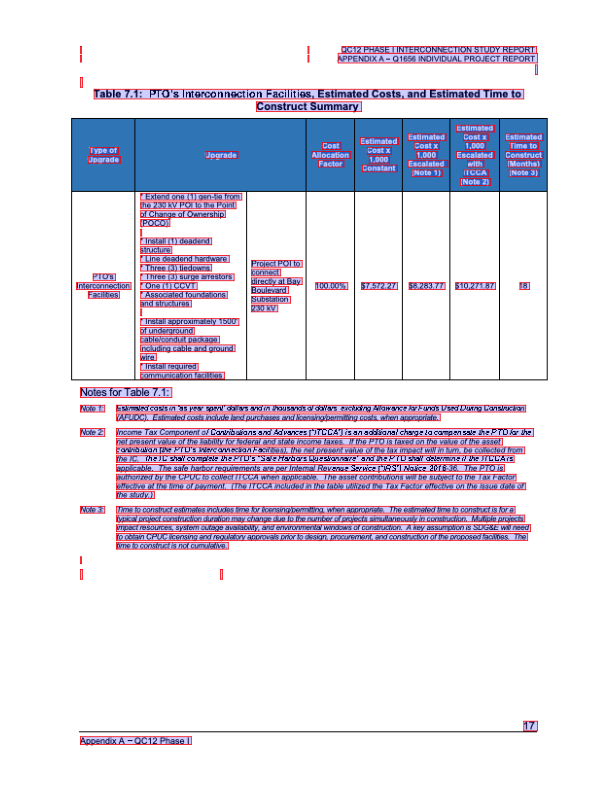

In [9]:
import pdfplumber
import matplotlib.pyplot as plt

# Path to your PDF file
pdf_path = "/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/03_data/1656/02_phase_1_study/QC12PhI_Q1656_Gypsy_ESS_Appendix_A_01-15-2020.pdf"

# Open the PDF
with pdfplumber.open(pdf_path) as pdf:
    # Select the first page (adjust index for other pages)
    page = pdf.pages[16]

    # Extract table lines
    table_lines = page.lines

    # Draw the detected lines
    img = page.to_image()

    # Draw the detected lines
    img.draw_rects(page.extract_words(keep_blank_chars=True, use_text_flow=True))
    img.draw_lines(table_lines, stroke="red")  # Highlight lines in red

    # Show the image with lines
    plt.figure(figsize=(10, 10))
    plt.imshow(img.annotated)
    plt.axis("off")
    plt.show()


In [423]:
from tabulate import tabulate
#pdf_path = "/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/03_data/1668/02_phase_1_study/QC12PhI_Q1668_Suffolk_Storage_Appendix_A_01-15-2020.pdf"

pdf_path = "/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/03_data/2153/02_phase_1_study/C14_Q2153_FrigatebirdStorage_PhI_9-15-2022.pdf"
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[18]

    # Try different extraction strategies
    table = page.extract_table({
        "vertical_strategy": "lines",  # Use text-based detection for better alignment
        "horizontal_strategy": "lines",
   
    
              "snap_tolerance":6,  # Optimal value to group close elements
        "join_tolerance": 6,  # Helps combine fragmented text within cells
        "intersection_x_tolerance": 1,  # Fine-tune vertical alignment
        "intersection_y_tolerance": 8,  # Adjust for row merging
    
    
    
   
                })

    if table:
        for row in table:
            print(tabulate(table, headers="firstrow", tablefmt="grid"))
 
        
'''

This works for the second table:

        "snap_tolerance":7,  # Optimal value to group close elements
        "join_tolerance": 6,  # Helps combine fragmented text within cells
        "intersection_x_tolerance": 5,  # Fine-tune vertical alignment
        "intersection_y_tolerance": 8,  # Adjust for row merging
    
        
                "snap_tolerance":5,  # Optimal value to group close elements
        "join_tolerance": 6,  # Helps combine fragmented text within cells
        "intersection_x_tolerance": 5,  # Fine-tune vertical alignment
        "intersection_y_tolerance": 4,  # Adjust for row merging


        Worked for all:
                "snap_tolerance":6,  # Optimal value to group close elements
        "join_tolerance": 6,  # Helps combine fragmented text within cells
        "intersection_x_tolerance": 1,  # Fine-tune vertical alignment
        "intersection_y_tolerance": 8,  # Adjust for row merging
        
'''        
    


+--------------------------------------------------------------+----------+
| Frigatebird Storage                                          | 2153     |
+==============================================================+==========+
| A. Current Cost Responsibility (CCR) for ANU                 |          |
+--------------------------------------------------------------+----------+
| A.1 GRNU ($k)                                                | $ 660    |
+--------------------------------------------------------------+----------+
| A.2 IRNU ($k)                                                | $ 174    |
+--------------------------------------------------------------+----------+
| A.3 LDNU ($k)                                                | $ -      |
+--------------------------------------------------------------+----------+
| A.4 LOPNU Cost ($k)                                          | $ -      |
+--------------------------------------------------------------+----------+
| Current Co

'\n\nThis works for the second table:\n\n        "snap_tolerance":7,  # Optimal value to group close elements\n        "join_tolerance": 6,  # Helps combine fragmented text within cells\n        "intersection_x_tolerance": 5,  # Fine-tune vertical alignment\n        "intersection_y_tolerance": 8,  # Adjust for row merging\n    \n        \n                "snap_tolerance":5,  # Optimal value to group close elements\n        "join_tolerance": 6,  # Helps combine fragmented text within cells\n        "intersection_x_tolerance": 5,  # Fine-tune vertical alignment\n        "intersection_y_tolerance": 4,  # Adjust for row merging\n\n\n        Worked for all:\n                "snap_tolerance":6,  # Optimal value to group close elements\n        "join_tolerance": 6,  # Helps combine fragmented text within cells\n        "intersection_x_tolerance": 1,  # Fine-tune vertical alignment\n        "intersection_y_tolerance": 8,  # Adjust for row merging\n        \n'

In [417]:
import os
import pdfplumber
import pandas as pd
import re
import PyPDF2
import traceback

# Define paths and project list
BASE_DIRECTORY = "/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/03_data"
OUTPUT_CSV_PATH_ORIGINAL = "/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/03_raw/rawdata_cluster12_style_N_originals.csv"
OUTPUT_CSV_PATH_ADDENDUM = "/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/03_raw/rawdata_cluster12_style_N_addendums.csv"
LOG_FILE_PATH = "/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/03_raw/scraping_cluster12_style_N_log.txt"

# List of Style N PDFs
STYLE_N_PDF_NAMES = [
     
    'QC12PhI_Q1656_Gypsy_ESS_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1657_Sandpiper_Storage_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1658_Cardinal_Storage_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1662_Ventasso_Energy_Storage_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1663_Hoodini_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1664_Cucapa_Energia_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1665_Kingsley_Solar_Farm_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1666_Salton_Solar_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1667_Wistaria_Ranch_Solar_2_Appendix_A_01-15-2020.pdf',
   'QC12PhI_Q1668_Suffolk_Storage_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1669_Pome_BESS_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1670_Peregrine_Storage_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1671_Marine_Depot_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1672_Boulder_Oaks_Hybrid_Appendix A_Rev1_03-03-2020.pdf',
   'QC12PhI_Q1673_Nighthawk_Storage_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1674_SV_Energy_Storage_Facility_Appendix_A_01-15-2020.pdf',
    'QC12PhI_Q1675_Resava_Energy_Storage_Appendix_A_01-15-2020.pdf'
]

# Extract q_ids from Style N PDF filenames
def extract_q_id(pdf_name):
    match = re.search(r'_Q(\d+)_', pdf_name)
    if match:
        return int(match.group(1))
    else:
        return None

STYLE_N_Q_IDS = [extract_q_id(name) for name in STYLE_N_PDF_NAMES if extract_q_id(name) is not None]

# Set PROJECT_LIST to the list of Style N q_ids
PROJECT_LIST = STYLE_N_Q_IDS

# Initialize DataFrames
core_originals = pd.DataFrame()
core_addendums = pd.DataFrame()

# Initialize tracking variables
scraped_projects = set()
skipped_projects = set()
missing_projects = set()
scraped_pdfs = []
skipped_pdfs = []
addendum_pdfs = []
original_pdfs = []
style_n_pdfs = []  # List to track style N PDFs
total_pdfs_accessed = 0
total_pdfs_scraped = 0
total_pdfs_skipped = 0
original_has_table7 = {}  # Dictionary to track if original PDFs have table7

# Define the list of specific phrases 2
SPECIFIC_PHRASES_2 = ["IRNU", "GRNU", "CANU-D", "IRNU-A"]

def clean_column_headers(headers):
    """
    Cleans column headers by normalizing and removing unwanted characters.

    Args:
        headers (list): List of raw column headers from the table.

    Returns:
        list: List of cleaned and normalized column headers.
    """
    cleaned_headers = []
    for header in headers:
        if header is None:
            header = ""
        elif isinstance(header, str):
            header = header.lower()
            header = re.sub(r'\s+', ' ', header)  # Normalize whitespace
            
            # Extract 'Escalated' if present inside parentheses
            match = re.search(r'\(.*?(escalated).*?\)', header, re.IGNORECASE)
            escalated_text = match.group(1).strip() if match else ""

            # Remove everything inside parentheses but retain 'escalated' if found
            header = re.sub(r'\(.*?\)', '', header).strip()
            
            # If 'Escalated' was found, append it to the cleaned header
            if escalated_text:
                header += f" {escalated_text}"
            
            header = re.sub(r'[^a-zA-Z0-9\s]', '', header)  # Remove special characters
            header = header.strip()

        cleaned_headers.append(header)

    # Handle specific header issues (e.g., 'Max of Estimated Time to Construct')
#    for i, col in enumerate(cleaned_headers):
#        if col.startswith("max of"):
#            cleaned_headers[i] = "max of estimated time to construct"
    return cleaned_headers


def clean_string_cell(value):
    """Cleans string cells by removing newlines and trimming spaces."""
    if isinstance(value, str):
        return value.replace('\n', ' ').strip()
    return value

def contains_phrase(row, phrase):
    """Checks if any cell in a row contains a specific phrase."""
    regex_pattern = re.sub(r"\s+", r"\\s*", phrase)
    pattern = re.compile(regex_pattern, flags=re.IGNORECASE)
    return row.astype(str).apply(lambda cell: bool(pattern.search(cell))).any()

def extract_specific_phrase(title):
    """
    Extracts a specific phrase from the table title based on predefined keywords.

    Args:
        title (str): The table title string.

    Returns:
        str: The extracted specific phrase if found, else the original title.
    """
    phrases = [
        "PTO",
        "Reliability Network Upgrade",
        "Area Delivery Network Upgrade",
        "Local Delivery Network",
        "Other Potential Network Upgrade",
        "Area Delivery Network Upgrades",
        "Conditionally Assigned Network Upgrades",
        "PTO's Interconnection Facilities",
        "Network Upgrades",
        "ADNU",
        "LDNU",
        "RNU"
    ]

    for phrase in phrases:
        if re.search(rf"\b{re.escape(phrase)}\b", title, re.IGNORECASE):
            return phrase
    return title  # Fallback to the entire title if no specific phrase is found

def reorder_columns(df):
    """
    Reorders the columns of the DataFrame based on the specified order.

    Args:
        df (pd.DataFrame): The DataFrame to reorder.

    Returns:
        pd.DataFrame: The reordered DataFrame.
    """
    desired_order = [
        "q_id",
        "cluster",
        "req_deliverability",
        "latitude",
        "longitude",
        "capacity",
        "point_of_interconnection",
        "type of upgrade",
        "upgrade",
        "description",
        "cost allocation factor"
    ]

    # Start with desired columns that exist in the DataFrame
    existing_desired = [col for col in desired_order if col in df.columns]

    # Then add the remaining columns
    remaining = [col for col in df.columns if col not in existing_desired]

    # Combine the two lists
    new_order = existing_desired + remaining

    # Reorder the DataFrame
    df = df[new_order]

    return df

def search_gps_coordinates(text, log_file):
    """Search for GPS coordinates using multiple patterns."""
    gps_coords = re.search(r"gps coordinates:\s*([\d\.\-]+),\s*([\d\.\-]+)", text, re.IGNORECASE)
    if gps_coords:
        print(f"Found GPS coordinates: {gps_coords.groups()}", file=log_file)
        return gps_coords.groups()

    project_coords = re.search(r"latitude[:\s]*([\d\.\-]+)[^\d]+longitude[:\s]*([\d\.\-]+)", text, re.IGNORECASE)
    if project_coords:
        print(f"Found project coordinates: {project_coords.groups()}", file=log_file)
        return project_coords.groups()

    gps_coords_directional = re.search(
        r"gps coordinates:\s*([\d\.\-]+)\s*[nNsS],\s*([\d\.\-]+)\s*[eEwW]", text, re.IGNORECASE)
    if gps_coords_directional:
        lat, lon = gps_coords_directional.groups()
        latitude = lat if "N" in text.upper() else f"-{lat}"  # Adjust latitude sign
        longitude = lon if "E" in text.upper() else f"-{lon}"  # Adjust longitude sign
        print(f"Found directional GPS coordinates: {(latitude, longitude)}", file=log_file)
        return (latitude, longitude)

    print("GPS coordinates not found.", file=log_file)
    return (None, None)

def extract_table1(pdf_path, log_file):
    """
    Extracts the Point of Interconnection from Table 1 in the provided PDF.
    Implements a retry mechanism with different table extraction settings if initial attempts fail.

    Args:
        pdf_path (str): Path to the PDF file.
        log_file (file object): Log file to write print statements.

    Returns:
        str: Extracted Point of Interconnection value,
             "Value Missing" if label found but no value,
             or None if not found.
    """
    print(f"\nProcessing {pdf_path} for Table 1 extraction...", file=log_file)
    point_of_interconnection = None

    # Define the regex pattern for 'Point of Interconnection' (case-insensitive)
    poi_pattern = re.compile(r"Point\s+of\s+Interconnection", re.IGNORECASE)

    # Define different table extraction settings to try
    table_settings_list = [
        {
            "horizontal_strategy": "text",
            "vertical_strategy": "lines",
            "snap_tolerance": 1,
        },
        {
            "horizontal_strategy": "lines",
            "vertical_strategy": "lines",
            "snap_tolerance": 2,  # Increased tolerance for retry
        }
    ]

    try:
        with pdfplumber.open(pdf_path) as pdf:
            # Identify all pages that contain "Table 1"
            table1_pages = []
            for i, page in enumerate(pdf.pages):
                text = page.extract_text() or ""
                if re.search(r"Table\s*1\b", text, re.IGNORECASE):
                    table1_pages.append(i)

            if not table1_pages:
                print("No Table 1 found in the PDF.", file=log_file)
                return None  # Return None if no Table 1 found

            first_page = table1_pages[0]
            last_page = table1_pages[-1]
            scrape_start = first_page
            scrape_end = last_page + 2  # Plus two to include the next page if needed

            print(f"Table 1 starts on page {scrape_start + 1} and ends on page {scrape_end + 1}", file=log_file)

            # Flag to indicate if extraction was successful
            extraction_successful = False

            # Iterate through the specified page range
            for page_number in range(scrape_start, min(scrape_end + 1, len(pdf.pages))):
                page = pdf.pages[page_number]
                print(f"\nScraping tables on page {page_number + 1} for Table 1...", file=log_file)

                for attempt, table_settings in enumerate(table_settings_list, start=1):
                    print(f"\nAttempt {attempt} with table settings: {table_settings}", file=log_file)
                    tables = page.find_tables(table_settings=table_settings)
                    print(f"Found {len(tables)} table(s) on page {page_number + 1} with current settings.", file=log_file)

                    for table_index, table in enumerate(tables, start=1):
                        tab = table.extract()
                        if not tab:
                            print(f"Table {table_index} on page {page_number + 1} is empty. Skipping.", file=log_file)
                            continue  # Skip empty tables

                        print(f"\n--- Table {table_index} on Page {page_number + 1} ---", file=log_file)
                        for row_num, row in enumerate(tab, start=1):
                            print(f"Row {row_num}: {row}", file=log_file)

                        # Iterate through each row in the table
                        for row_index, row in enumerate(tab, start=1):
                            # Iterate through each cell in the row
                            for cell_index, cell in enumerate(row, start=1):
                                if cell and poi_pattern.search(cell):
                                    # Assuming the next column contains the value
                                    poi_col_index = cell_index  # 1-based index
                                    adjacent_col_index = poi_col_index + 1  # Next column

                                    if adjacent_col_index <= len(row):
                                        poi_value = clean_string_cell(row[adjacent_col_index - 1])
                                        if poi_value:  # Check if the value is not empty
                                            point_of_interconnection = poi_value
                                            print(f"\nFound Point of Interconnection: '{point_of_interconnection}' "
                                                  f"(Page {page_number + 1}, Table {table_index}, Row {row_index})", file=log_file)
                                            extraction_successful = True
                                            break  # Exit the cell loop
                                        else:
                                            print(f"\nPoint of Interconnection label found but adjacent value is empty "
                                                  f"(Page {page_number + 1}, Table {table_index}, Row {row_index}).", file=log_file)
                                            # Proceed to scan surrounding rows for the value
                                            poi_value_parts = []

                                            # Define the range to scan: two rows above and two rows below
                                            # Convert to 0-based index
                                            current_row_idx = row_index - 1
                                            start_scan = max(0, current_row_idx - 2)
                                            end_scan = min(len(tab), current_row_idx + 3)  # Exclusive

                                            print(f"Scanning rows {start_scan + 1} to {end_scan} for POI value parts.", file=log_file)

                                            for scan_row_index in range(start_scan, end_scan):
                                                # Skip the current row where the label was found
                                                if scan_row_index == current_row_idx:
                                                    continue

                                                scan_row = tab[scan_row_index]
                                                # Ensure the adjacent column exists in the scan row
                                                if adjacent_col_index - 1 < len(scan_row):
                                                    scan_cell = clean_string_cell(scan_row[adjacent_col_index - 1])
                                                    if scan_cell and not poi_pattern.search(scan_cell):
                                                        poi_value_parts.append(scan_cell)
                                                        print(f"Found POI part in row {scan_row_index + 1}: '{scan_cell}'", file=log_file)
                                                    elif poi_pattern.search(scan_cell):
                                                        # If another POI label is found, skip it
                                                        print(f"Encountered another POI label in row {scan_row_index + 1}. Skipping this row.", file=log_file)
                                                        continue

                                            if poi_value_parts:
                                                # Concatenate the parts to form the complete POI value
                                                point_of_interconnection = " ".join(poi_value_parts)
                                                print(f"\nConcatenated Point of Interconnection: '{point_of_interconnection}' "
                                                      f"(Page {page_number + 1}, Table {table_index})", file=log_file)
                                                extraction_successful = True
                                                break  # Exit the cell loop
                                            else:
                                                print(f"\nNo POI value found in the surrounding rows "
                                                      f"(Page {page_number + 1}, Table {table_index}, Row {row_index}).", file=log_file)
                                                # Do not return immediately; proceed to retry
                                    else:
                                        print(f"\nPoint of Interconnection label found but no adjacent column "
                                              f"(Page {page_number + 1}, Table {table_index}, Row {row_index}).", file=log_file)
                                        # Do not return immediately; proceed to retry
                            if extraction_successful:
                                break  # Exit the row loop
                        if extraction_successful:
                            break  # Exit the table loop
                    if extraction_successful:
                        break  # Exit the attempt loop
                if extraction_successful:
                    break  # Exit the page loop

    except Exception as e:
        print(f"Error processing Table 1 in {pdf_path}: {e}", file=log_file)
        print(traceback.format_exc(), file=log_file)
        return None

    if not extraction_successful:
        # After all attempts, determine the appropriate return value
        if point_of_interconnection is not None and point_of_interconnection != "":
            # Label was found but no value
            print("Point of Interconnection label found but no adjacent value.", file=log_file)
            return "Value Missing"
        else:
            # Label not found
            print("Point of Interconnection not found in Table 1.", file=log_file)
            return None

    return point_of_interconnection

def extract_base_data(pdf_path, project_id, log_file):
    """Extract base data from the PDF and return as a DataFrame."""
    print("Extracting base data from PDF...", file=log_file)
    try:
        with open(pdf_path, 'rb') as pdf_file:
            reader = PyPDF2.PdfReader(pdf_file)
            text = ""
            for page in reader.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text

        text = clean_string_cell(text)

        queue_id = re.search(r"q[\s_-]*(\d+)", text, re.IGNORECASE)
        queue_id = queue_id.group(1) if queue_id else str(project_id)  # Use project_id if queue_id is not found
        print(f"Extracted Queue ID: {queue_id}", file=log_file)

        # Updated Cluster Extraction
        clusters = re.findall(r"queue[\s_-]*cluster[\s_-]*(\d+)", text, re.IGNORECASE)
        if '12' in clusters:
            cluster_number = '12'
        elif clusters:
            cluster_number = max(clusters, key=lambda x: int(x))  # Choose the highest cluster number found
        else:
            cluster_number = '12'  # Default to 12 if not found
        print(f"Extracted Cluster Number: {cluster_number}", file=log_file)

        deliverability_status = re.search(r"(\w+)\s*capacity deliverability status", text, re.IGNORECASE)
        deliverability_status = deliverability_status.group(1) if deliverability_status else None
        print(f"Extracted Deliverability Status: {deliverability_status}", file=log_file)

        # Extract Capacity
        capacity = re.search(r"total rated output of (\d+)\s*mw", text, re.IGNORECASE)
        if capacity:
            capacity = int(capacity.group(1))
        else:
            capacity2 = re.search(r"(\d+)\s*mw", text)
            capacity = int(capacity2.group(1)) if capacity2 else None
        print(f"Extracted Capacity: {capacity}", file=log_file)

        # Extract Point of Interconnection
        point_of_interconnection = extract_table1(pdf_path, log_file)

        latitude, longitude = search_gps_coordinates(text, log_file)

        # Initialize base data dictionary
        base_data = {
            "q_id": [queue_id],
            "cluster": [cluster_number],
            "req_deliverability": [deliverability_status],
            "latitude": [latitude],
            "longitude": [longitude],
            "capacity": [capacity],
            "point_of_interconnection": [point_of_interconnection]
        }

        print("Base data extracted:", file=log_file)
        print(base_data, file=log_file)
        return pd.DataFrame(base_data)

    except Exception as e:
        print(f"Error extracting base data from {pdf_path}: {e}", file=log_file)
        print(traceback.format_exc(), file=log_file)
        return pd.DataFrame()  # Return empty DataFrame on error

def adjust_rows_length(data_rows, headers):
    """Ensure each row in data_rows matches the length of headers by truncating or padding."""
    col_count = len(headers)
    for i in range(len(data_rows)):
        row = data_rows[i]
        if len(row) > col_count:
            data_rows[i] = row[:col_count]
        elif len(row) < col_count:
            data_rows[i].extend([""]*(col_count - len(row)))

 
def extract_table7(pdf_path, log_file, is_addendum=False):
    """
    Extracts Table 7-1 to 7-3 data from the provided PDF.

    Args:
        pdf_path (str): Path to the PDF file.
        log_file (file object): Log file to write print statements.
        is_addendum (bool): Whether the PDF is an addendum.

    Returns:
        pd.DataFrame: Extracted Table 7 data.
    """
    print(f"\nProcessing {pdf_path} for Table 7 extraction...", file=log_file)
    extracted_tables = []
    specific_phrase = None  # Holds the last extracted table title

    try:
        with pdfplumber.open(pdf_path) as pdf:
            # Identify pages that contain "Table 7-1" to "Table 7-3" or "7.1" to "7.3"
            table7_pages = []
            for i, page in enumerate(pdf.pages):
                text = page.extract_text() or ""
                if re.search(r"Table\s*7[-.]([1-3])\b", text, re.IGNORECASE):
                    table7_pages.append(i)

            if not table7_pages:
                print("No Table 7-1 to 7-3 found in the PDF.", file=log_file)
                return pd.DataFrame()

            first_page = table7_pages[0]
            last_page = table7_pages[-1]
            scrape_start = first_page
            scrape_end = last_page + 1

            for page_number in range(scrape_start, min(scrape_end, len(pdf.pages))):
                page = pdf.pages[page_number]
                print(f"\nScraping tables on page {page_number + 1}...", file=log_file)
                tables = page.find_tables(table_settings={
                    "horizontal_strategy": "lines",
                    "vertical_strategy": "lines",
                            "snap_tolerance":6,  # Optimal value to group close elements
                    "join_tolerance": 6,  # Helps combine fragmented text within cells
                    "intersection_x_tolerance": 1,  # Fine-tune vertical alignment
                    "intersection_y_tolerance": 8,  # Adjust for row merging
                })

                for table_index, table in enumerate(tables, start=1):
                    tab = table.extract()
                    if not tab:
                        print(f"Table {table_index + 1} on page {page_number + 1} is empty. Skipping.", file=log_file)
                        continue

                    # Extract table title from the region above the table
                    table_bbox = table.bbox
                    title_bbox = (0, 0, page.width, table_bbox[1])
                    title_text = page.within_bbox(title_bbox).extract_text() or ""
                    table_title = None

                    if title_text.strip():  # If title is found in the bounding box above the table
                        title_lines = title_text.split("\n")[::-1]
                        for line in title_lines:
                            line = line.strip()
                            match = re.search(r"(Modification\s+of\s+)?Table\s*7[-.]([1-3])[:\-\s]*(.*)", line, re.IGNORECASE)
                            if match:
                                table_title = match.group(3).strip()
                                break
                    else:
                        # If no title is found, use the last table title
                        print(f"No title found above table on page {page_number + 1}, table {table_index}. Using last specific phrase.", file=log_file)
                        table_title = specific_phrase

                    if table_title:
                        specific_phrase = extract_specific_phrase(table_title)

                    # Clean headers and data
                    headers = tab[0]
                    data_rows = tab[1:]

                     

                    # Clean headers
                                        # Clean headers and replace empty ones
                    headers = clean_column_headers(headers)
                    headers = [f"unnamed_{i+1}" if not header else header for i, header in enumerate(headers)]
                    
                    print(f"Table {table_index} on page {page_number + 1} headers: {headers}", file=log_file)

                    # Check for required columns
                    if not any(col in headers for col in ["upgrade", "network upgrade type"]):
                        print(f"Required columns not found on page {page_number + 1}, table {table_index}. Retrying extraction with basic settings...", file=log_file)
                        
                        # Retry extraction with basic settings
                        tables_basic = page.find_tables(table_settings={
                            "horizontal_strategy": "lines",
                            "vertical_strategy": "lines",
                        })

                        if not tables_basic:
                            print(f"No tables found on retry. Skipping page {page_number + 1}.", file=log_file)
                            continue  # Move to the next page

                        # Re-extract with basic settings
                        tab_basic = tables_basic[0].extract()
                        
                        headers = clean_column_headers(tab_basic[0])
                        headers = [f"unnamed_{i+1}" if not header else header for i, header in enumerate(headers)]
                        data_rows = tab_basic[1:]


                        


                     

                    

                     

                    # Create DataFrame
                    try:
                        df = pd.DataFrame(data_rows, columns=headers)

                        if "max of" in df.columns:
                            df.drop(columns=["max of"], inplace=True)
                            print(f"Dropped 'Max of' column in table on page {page_number + 1}, table {table_index}.", file=log_file)


                        if "estimated" in df.columns:
                            df.drop(columns = ["estimated"], inplace=True)
                            print(f"Dropped 'estimated' column in table on page {page_number + 1}, table {table_index}.", file=log_file)    


                        # Replace "None" in "type of upgrade" for tables without "network upgrade type"
                        if "type of upgrade" in df.columns and "network upgrade type" not in df.columns:
                            first_row = df.iloc[0]
                            if pd.isna(first_row["type of upgrade"]) or first_row["type of upgrade"] == "":
                                df["type of upgrade"] = specific_phrase


                                

                        # Special logic for ADNU tables
                        if re.search(r"(Area\s*Delivery\s*Network\s*Upgrades)?ADNU", specific_phrase, re.IGNORECASE):
                            if "adnu" in df.columns:
                                if "type of upgrade" not in df.columns:
                                    # Group all adnu rows into one "upgrade" row
                                    adnu_values = df["adnu"].dropna().astype(str).tolist()
                                    grouped_adnu = " ".join(adnu_values)
                                    other_columns = df.drop(columns=["adnu"]).iloc[0].to_dict()

                                    df_grouped = pd.DataFrame({
                                        "upgrade": [grouped_adnu],
                                        "type of upgrade": [specific_phrase]
                                    })

                                    for col, value in other_columns.items():
                                        df_grouped[col] = value

                                    df = df_grouped
                                else:
                                    # Rename "adnu" if necessary
                                    if "upgrade" in df.columns:
                                        df.drop(columns=["adnu"], inplace=True)
                                    else:
                                        df.rename(columns={"adnu": "upgrade"}, inplace=True)

                            if "type of upgrade" not in df.columns:
                                df["type of upgrade"] = specific_phrase
                            else:
                                first_row = df.iloc[0]
                                if pd.isna(first_row["type of upgrade"]) or first_row["type of upgrade"] == "":
                                    df.at[0, "type of upgrade"] = specific_phrase

                        elif re.search(r"Network\s*Upgrades", specific_phrase, re.IGNORECASE):
                            if "type of upgrade" not in df.columns:
                                df["type of upgrade"] = "RNU"    


                        elif re.search(r"PTO’s Interconnection Facilities", specific_phrase, re.IGNORECASE):
                            if "type of upgrade" not in df.columns:
                                df["type of upgrade"] = "PTO's Interconnection Facilities"

                            elif pd.isna(first_row["type of upgrade"]) or first_row["type of upgrade"] == "":
                                    df.at[0, "type of upgrade"] = "PTO's Interconnection Facilities"


                        if "type of upgrade" not in df.columns:
                                df["type of upgrade"] = specific_phrase            


                                    

                                    

                        base_columns = [
                             "type of upgrade"
                        ]
                        remaining_columns = [col for col in df.columns if col not in base_columns]

                        df = df.dropna(subset=remaining_columns, how='all')


                        # Ensure no duplicate columns
                        if df.columns.duplicated().any():
                            df = df.loc[:, ~df.columns.duplicated()]

                        extracted_tables.append(df)
                        print(f"Extracted table from page {page_number + 1}, table {table_index}.", file=log_file)

                    except ValueError as ve:
                        print(f"Error creating DataFrame for table on page {page_number + 1}, table {table_index}: {ve}", file=log_file)
                        continue

                    except Exception as e:
                        print(f"Error processing page {page_number + 1}: {e}", file=log_file)
                        continue  # Skip the page if an error occurs

    except Exception as e:
        print(f"Error processing Table 7 in {pdf_path}: {e}", file=log_file)
        print(traceback.format_exc(), file=log_file)
        return pd.DataFrame()

    # Concatenate all extracted tables
    if extracted_tables:
        try:
            combined_df = pd.concat(extracted_tables, ignore_index=True, sort=False)
            print(f"Successfully combined {len(extracted_tables)} tables.", file=log_file)
            return combined_df
        except Exception as e:
            print(f"Error concatenating extracted tables: {e}", file=log_file)
            print(traceback.format_exc(), file=log_file)
            return pd.DataFrame()
    else:
        print("No Table 7 data extracted.", file=log_file)
        return pd.DataFrame()


def scrape_alternative_tables(pdf_path, log_file, specific_phrases):
    """
    Scrapes all tables in the PDF that contain any of the specific phrases in their cells.
    For Style N tables with 'Network Upgrade Type' column, handles 'type of upgrade' accordingly.

    Args:
        pdf_path (str): Path to the PDF file.
        log_file (file object): Log file to write print statements.
        specific_phrases (list): List of specific phrases to search for.

    Returns:
        pd.DataFrame: Extracted data from alternative tables containing the specific phrases.
    """
    print(f"\nProcessing {pdf_path} for alternative table scraping...", file=log_file)
    extracted_tables = []

    try:
        with pdfplumber.open(pdf_path) as pdf:
            for page_number, page in enumerate(pdf.pages, start=1):
                tables = page.find_tables(table_settings={
                    "horizontal_strategy": "lines",
                    "vertical_strategy": "lines",
                })
                for table_index, table in enumerate(tables, start=1):
                    tab = table.extract()
                    if not tab:
                        continue
                    # Check if any cell contains any of the specific phrases
                    match_found = False
                    for row in tab:
                        for cell in row:
                            if cell and any(re.search(rf"\b{re.escape(phrase)}\b", cell, re.IGNORECASE) for phrase in specific_phrases):
                                match_found = True
                                break
                        if match_found:
                            break
                    if match_found:
                        headers = clean_column_headers(tab[0])
                        headers = make_unique_headers(headers)  # Ensure headers are unique
                        data_rows = tab[1:]

                        # Extra Check: Only process tables with 'Upgrade' or 'Network Upgrade Type' columns
                        if not any(col in headers for col in ["upgrade", "network upgrade type"]):
                            print(f"Skipping alternative Table {table_index} on page {page_number} as it lacks 'Upgrade' or 'Network Upgrade Type' columns.", file=log_file)
                            continue

                        has_network_upgrade_type = "network upgrade type" in headers

                        if has_network_upgrade_type:
                            print(f"'Network Upgrade Type' column found in alternative Table {table_index} on page {page_number}.", file=log_file)
                            # Create 'type of upgrade' column if it doesn't exist
                            if "type of upgrade" not in headers:
                                headers.append("type of upgrade")
                                tab[0].append("type of upgrade")  # Add header to the table data
                            df_new = pd.DataFrame(data_rows, columns=headers)

                            # Initialize 'type of upgrade' column with None
                            if "type of upgrade" not in df_new.columns:
                                df_new["type of upgrade"] = None

                            current_upgrade = None
                            for idx, row in df_new.iterrows():
                                network_upgrade = str(row.get("network upgrade type", "")).strip()
                                if network_upgrade.lower() == "total":
                                    current_upgrade = None
                                elif network_upgrade in SPECIFIC_PHRASES_2:
                                    current_upgrade = network_upgrade
                                    df_new.at[idx, "type of upgrade"] = current_upgrade
                                elif current_upgrade:
                                    df_new.at[idx, "type of upgrade"] = current_upgrade
                            print(f"Populated 'type of upgrade' column based on 'Network Upgrade Type' in alternative Table {table_index}.", file=log_file)
                        else:
                            # Handle tables without 'Network Upgrade Type'
                            try:
                                df_new = pd.DataFrame(data_rows, columns=headers)
                            except ValueError as ve:
                                print(f"Error creating DataFrame for alternative Table {table_index} on page {page_number}: {ve}", file=log_file)
                                continue

                            # Continue with existing specific phrase checks
                            # Assuming you have a specific_phrase variable from elsewhere; adjust as needed
                            if specific_phrase:
                                if "type of upgrade" not in df_new.columns:
                                    df_new["type of upgrade"] = specific_phrase
                                    print(f"Added 'type of upgrade' to all rows in alternative Table {table_index}.", file=log_file)
                                else:
                                    first_row = df_new.iloc[0]
                                    if pd.isna(first_row["type of upgrade"]) or first_row["type of upgrade"] == "":
                                        df_new.at[0, "type of upgrade"] = specific_phrase
                                        print(f"Replaced None in 'type of upgrade' for alternative Table {table_index} on page {page_number}.", file=log_file)

                        if df_new.columns.duplicated().any():
                            print(f"Duplicate columns detected in alternative Table {table_index} on page {page_number}. Dropping duplicates.", file=log_file)
                            df_new = df_new.loc[:, ~df_new.columns.duplicated()]

                        extracted_tables.append(df_new)

    except Exception as e:
        print(f"Error scraping alternative tables in {pdf_path}: {e}", file=log_file)
        print(traceback.format_exc(), file=log_file)
        return pd.DataFrame()

    if extracted_tables:
        all_columns = set()
        for df in extracted_tables:
            all_columns.update(df.columns.tolist())

        standardized_tables = []
        for df in extracted_tables:
            standardized_df = df.reindex(columns=all_columns)
            standardized_tables.append(standardized_df)

        print("\nConcatenating all extracted alternative tables...", file=log_file)
        try:
            alternative_data = pd.concat(standardized_tables, ignore_index=True, sort=False)
            print(f"Successfully concatenated {len(standardized_tables)} alternative tables.", file=log_file)
            return alternative_data
        except Exception as e:
            print(f"Error concatenating alternative tables: {e}", file=log_file)
            print(traceback.format_exc(), file=log_file)
            return pd.DataFrame()
    else:
        print("No alternative tables found containing specific phrases.", file=log_file)
        return pd.DataFrame()


def extract_table7_and_replace_none(pdf_path, project_id, log_file, is_addendum=False):
    """Extracts Table 7 data and merges with base data."""
    base_data = extract_base_data(pdf_path, project_id, log_file)
    table7_data = extract_table7(pdf_path, log_file, is_addendum)

    if table7_data.empty:
        if is_addendum and original_has_table7.get(project_id, False):
            # Scrape alternative tables based on specific phrases
            specific_phrases = [
                "PTO",
                "Reliability Network Upgrade",
                "Area Delivery Network Upgrade",
                "Local Delivery Network",
                "Other Potential Network Upgrade",
                "Area Delivery Network Upgrades",
                "Conditionally Assigned Network Upgrades",
                "ADNU",
                "LDNU",
                "RNU"
            ]
            alternative_data = scrape_alternative_tables(pdf_path, log_file, specific_phrases)
            if not alternative_data.empty:
                table7_data = alternative_data
    if table7_data.empty:
        return base_data
    else:
        # Identify overlapping columns excluding 'point_of_interconnection'
        overlapping_columns = base_data.columns.intersection(table7_data.columns).difference(['point_of_interconnection'])
        table7_data = table7_data.drop(columns=overlapping_columns, errors='ignore')

        # Repeat base data for each row in table7_data
        base_data_repeated = pd.concat([base_data] * len(table7_data), ignore_index=True)

        try:
            # Concatenate base data with Table 7 data along columns
            merged_df = pd.concat([base_data_repeated, table7_data], axis=1, sort=False)
           # if "q_id" in merged_df.columns and "type of upgrade" in merged_df.columns and "upgrade" in merged_df.columns:
           #     merged_df["is_duplicate"] = merged_df.duplicated(subset=["q_id", "type of upgrade", "upgrade"], keep="first")
            #    merged_df = merged_df[merged_df["is_duplicate"] == False].drop(columns=["is_duplicate"])
            #    print(f"Removed duplicate rows based on 'q_id', 'type of upgrade', and 'upgrade'.", file=log_file)


            if "q_id" in merged_df.columns and "type of upgrade" in merged_df.columns and "upgrade" in merged_df.columns:
                # Identify rows where 'type of upgrade' and 'upgrade' are not empty
                non_empty_rows = merged_df[
                    merged_df["type of upgrade"].notna() & merged_df["upgrade"].notna() &
                    (merged_df["type of upgrade"].str.strip() != "") & (merged_df["upgrade"].str.strip() != "")
                ]

                # Group by q_id, type of upgrade, and upgrade, keeping the first occurrence
                grouped_df = non_empty_rows.groupby(["q_id", "type of upgrade", "upgrade"], as_index=False).first()

                # Get the original order of the rows in merged_df before filtering
                merged_df["original_index"] = merged_df.index

                # Combine unique grouped rows with originally empty rows
                final_df = pd.concat([
                    grouped_df,
                    merged_df[merged_df["type of upgrade"].isna() | (merged_df["type of upgrade"].str.strip() == "") |
                            merged_df["upgrade"].isna() | (merged_df["upgrade"].str.strip() == "")]
                ], ignore_index=True, sort=False)

                # Restore the original order of the rows based on the saved index
                final_df.sort_values(by="original_index", inplace=True)
                final_df.drop(columns=["original_index"], inplace=True)
                merged_df = final_df

                print(f"Removed duplicate rows based on 'q_id', 'type of upgrade', and 'upgrade', excluding empty rows while preserving order.", file=log_file)

            

            # Ensure 'point_of_interconnection' is present and correctly populated
            if 'point_of_interconnection' not in merged_df.columns:
                merged_df['point_of_interconnection'] = base_data['point_of_interconnection'].iloc[0]
                print(f"Added 'point_of_interconnection' to merged data for {pdf_path}.", file=log_file)

            print(f"Merged base data with Table 7 data for {pdf_path}.", file=log_file)
            return merged_df
        except Exception as e:
            print(f"Error merging base data with Table 7 data for {pdf_path}: {e}", file=log_file)
            print(traceback.format_exc(), file=log_file)
            return base_data  # Fallback to base data only

def check_has_table7(pdf_path):
    """Checks if the PDF contains Table 7-1 to 7-3."""
    try:
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                text = page.extract_text() or ""
                if re.search(r"(Modification\s+of\s+)?Table\s*7[-.]([1-3])\b", text, re.IGNORECASE):
                    return True
    except Exception as e:
        # Handle potential errors when opening PDF
        return False
    return False

def has_network_upgrade_type_column(pdf_path, log_file):
    """Checks if any table in the PDF has a column header 'Network Upgrade Type'."""
    try:
        with pdfplumber.open(pdf_path) as pdf:
            for page_number, page in enumerate(pdf.pages, start=1):
                tables = page.find_tables()
                for table_index, table in enumerate(tables, start=1):
                    tab = table.extract()
                    if not tab:
                        continue
                    headers = clean_column_headers(tab[0])
                    if "network upgrade type" in headers:
                        print(f"Found 'Network Upgrade Type' in PDF {pdf_path} on page {page_number}, table {table_index}.", file=log_file)
                        return True
    except Exception as e:
        print(f"Error checking 'Network Upgrade Type' in {pdf_path}: {e}", file=log_file)
        print(traceback.format_exc(), file=log_file)
    return False

def is_addendum(pdf_path, log_file):
    """Checks if the PDF is an addendum by searching 'Addendum' or 'Revision' on the first page."""
    try:
        with pdfplumber.open(pdf_path) as pdf:
            if len(pdf.pages) == 0:
                return False
            first_page = pdf.pages[0]
            text = first_page.extract_text() or ""
            print(f"Extracted Text: {text}", file= log_file)  # Debugging step
            # Case-insensitive check for 'Addendum' or 'Revision'
            text_lower = text.lower()
            return "addendum" in text_lower in text_lower
    except Exception as e:
        # Handle potential errors when opening PDF
        return False

def make_unique_headers(headers):
    """
    Appends a suffix to duplicate headers to make them unique.

    Args:
        headers (list): List of column headers.

    Returns:
        list: List of unique column headers.
    """
    seen = {}
    unique_headers = []
    for header in headers:
        if header in seen:
            seen[header] += 1
            unique_headers.append(f"{header}_{seen[header]}")
        else:
            seen[header] = 1
            unique_headers.append(header)
    return unique_headers

def process_pdfs_in_folder():
    """Processes all Style N PDFs in the specified project list and directory."""
    global core_originals, core_addendums, total_pdfs_accessed, total_pdfs_scraped, total_pdfs_skipped

    # Ensure the log file directory exists
    os.makedirs(os.path.dirname(LOG_FILE_PATH), exist_ok=True)

    with open(LOG_FILE_PATH, 'w') as log_file:
        for project_id in PROJECT_LIST:
            project_path = os.path.join(BASE_DIRECTORY, str(project_id), "02_phase_1_study")
            if not os.path.exists(project_path):
                missing_projects.add(project_id)
                print(f"Project path does not exist: {project_path}", file=log_file)
                continue

            project_scraped = False  # Flag to track if any PDF in the project was scraped
            base_data_extracted = False
            base_data = pd.DataFrame()

            # Identify Style N PDFs in the project
            list_pdfs = [pdf for pdf in os.listdir(project_path) if pdf.endswith(".pdf")]
            style_n_pdfs_in_project = [pdf for pdf in list_pdfs if pdf in STYLE_N_PDF_NAMES]

            if not style_n_pdfs_in_project:
                skipped_projects.add(project_id)
                print(f"No Style N PDFs found in Project {project_id}.", file=log_file)
                continue

            for pdf_name in style_n_pdfs_in_project:
                pdf_path = os.path.join(project_path, pdf_name)
                total_pdfs_accessed += 1

                is_add = is_addendum(pdf_path, log_file)

                # Check if PDF has 'Network Upgrade Type' column
                has_network_upgrade = has_network_upgrade_type_column(pdf_path, log_file)

                if has_network_upgrade:
                    print(f"Processing Style N PDF: {pdf_name} from Project {project_id} with 'Network Upgrade Type' column.", file=log_file)
                else:
                    print(f"Processing Style N PDF: {pdf_name} from Project {project_id} without 'Network Upgrade Type' column.", file=log_file)

                try:
                    has_table7 = check_has_table7(pdf_path)
                    original_has_table7[project_id] = has_table7

                    if not has_table7:
                        skipped_pdfs.append(pdf_name)
                        print(f"Skipped PDF: {pdf_name} from Project {project_id} (No Table 7)", file=log_file)
                        print(f"Skipped PDF: {pdf_name} from Project {project_id} (No Table 7)")
                        total_pdfs_skipped += 1
                        continue

                    if not base_data_extracted:
                        # Extract base data from original PDF
                        base_data = extract_base_data(pdf_path, project_id, log_file)
                        base_data_extracted = True
                        print(f"Extracted base data from Style N PDF: {pdf_name}", file=log_file)

                    # Extract Table 7 and merge
                    df = extract_table7_and_replace_none(pdf_path, project_id, log_file, is_addendum=is_add)
                    if not df.empty:
                        if is_add:
                            core_addendums = pd.concat([core_addendums, df], ignore_index=True)
                        else:
                            core_originals = pd.concat([core_originals, df], ignore_index=True)
                        scraped_pdfs.append(pdf_name)
                        scraped_projects.add(project_id)
                        project_scraped = True
                        total_pdfs_scraped += 1
                        print(f"Scraped PDF: {pdf_name} from Project {project_id}")
                    else:
                        skipped_pdfs.append(pdf_name)
                        print(f"Skipped PDF: {pdf_name} from Project {project_id} (Empty Data)", file=log_file)
                        print(f"Skipped PDF: {pdf_name} from Project {project_id} (Empty Data)")
                        total_pdfs_skipped += 1

                except Exception as e:
                    skipped_pdfs.append(pdf_name)
                    print(f"Skipped PDF: {pdf_name} from Project {project_id} due to an error: {e}", file=log_file)
                    print(traceback.format_exc(), file=log_file)
                    print(f"Skipped PDF: {pdf_name} from Project {project_id} due to an error: {e}")
                    total_pdfs_skipped += 1

            # After processing all PDFs for this project, check if any PDF was scraped
            if not project_scraped and os.path.exists(project_path):
                skipped_projects.add(project_id)

    # After processing all PDFs, save to CSV
    save_to_csv(core_originals, OUTPUT_CSV_PATH_ORIGINAL, "originals")
    save_to_csv(core_addendums, OUTPUT_CSV_PATH_ADDENDUM, "addendums")

    # Calculate total projects processed
    total_projects_processed = len(scraped_projects) + len(skipped_projects)

    # Print summary to ipynb
    print("\n=== Scraping Summary ===")
    print(f"Total Projects Processed: {total_projects_processed}")
    print(f"Total Projects Scraped: {len(scraped_projects)}")
    print(f"Total Projects Skipped: {len(skipped_projects)}")
    print(f"Total Projects Missing: {len(missing_projects)}")
    print(f"Total PDFs Accessed: {total_pdfs_accessed}")
    print(f"Total PDFs Scraped: {total_pdfs_scraped}")
    print(f"Total PDFs Skipped: {total_pdfs_skipped}")

    print("\nList of Scraped Projects:")
    print(sorted(scraped_projects))

    print("\nList of Skipped Projects:")
    print(sorted(skipped_projects))

    print("\nList of Missing Projects:")
    print(sorted(missing_projects))

    print("\nList of Scraped PDFs:")
    print(scraped_pdfs)

    print("\nList of Skipped PDFs:")
    print(skipped_pdfs)

    print("\nList of Addendum PDFs:")
    print(addendum_pdfs)

    print("\nList of Original PDFs:")
    print(original_pdfs)

    print("\nList of Style N PDFs (Skipped due to 'Network Upgrade Type'):")
    print(style_n_pdfs)

    print("\nTotal Number of Style N PDFs:", len(style_n_pdfs))

    print("\nNumber of Original PDFs Scraped:", len([pdf for pdf in scraped_pdfs if pdf in original_pdfs]))
    print("Number of Addendum PDFs Scraped:", len([pdf for pdf in scraped_pdfs if pdf in addendum_pdfs]))

def save_to_csv(df, output_csv_path, data_type):
    """Cleans the DataFrame and saves it to a CSV file."""
    if df.empty:
        print(f"No data to save for {data_type}.")
        return

    # Clean up the entire DataFrame by cleaning string cells
    df = df.applymap(clean_string_cell)

    # Drop rows that contain specific phrases (e.g., "Type of Upgrade")
    df = df[~df.apply(lambda row: contains_phrase(row, "Type of Upgrade"), axis=1)]

    # Reorder columns as specified
    df = reorder_columns(df)
    print(f"\nColumns reordered for {data_type} as per specification.")

    # Ensure q_id is numeric for sorting, replace missing values with None
    if 'q_id' in df.columns:
        df['q_id'] = pd.to_numeric(df['q_id'], errors='coerce')

    # Save the DataFrame to CSV
    try:
        df.to_csv(output_csv_path, index=False)
        print(f"\nData successfully saved to {output_csv_path}")
    except Exception as e:
        print(f"Error saving {data_type} data to CSV: {e}")
        print(traceback.format_exc())

def main():
    """Main function to execute the PDF scraping process."""
    process_pdfs_in_folder()

if __name__ == "__main__":
    main()


Scraped PDF: QC12PhI_Q1656_Gypsy_ESS_Appendix_A_01-15-2020.pdf from Project 1656
Scraped PDF: QC12PhI_Q1657_Sandpiper_Storage_Appendix_A_01-15-2020.pdf from Project 1657
Scraped PDF: QC12PhI_Q1658_Cardinal_Storage_Appendix_A_01-15-2020.pdf from Project 1658
Scraped PDF: QC12PhI_Q1662_Ventasso_Energy_Storage_Appendix_A_01-15-2020.pdf from Project 1662
Scraped PDF: QC12PhI_Q1663_Hoodini_Appendix_A_01-15-2020.pdf from Project 1663
Scraped PDF: QC12PhI_Q1664_Cucapa_Energia_Appendix_A_01-15-2020.pdf from Project 1664
Scraped PDF: QC12PhI_Q1665_Kingsley_Solar_Farm_Appendix_A_01-15-2020.pdf from Project 1665
Scraped PDF: QC12PhI_Q1666_Salton_Solar_Appendix_A_01-15-2020.pdf from Project 1666
Scraped PDF: QC12PhI_Q1667_Wistaria_Ranch_Solar_2_Appendix_A_01-15-2020.pdf from Project 1667
Scraped PDF: QC12PhI_Q1668_Suffolk_Storage_Appendix_A_01-15-2020.pdf from Project 1668
Scraped PDF: QC12PhI_Q1669_Pome_BESS_Appendix_A_01-15-2020.pdf from Project 1669
Scraped PDF: QC12PhI_Q1670_Peregrine_Storage_

/var/folders/l5/3g5pj1nj2j108yb2yjngfmcmcmdwpt/T/ipykernel_83581/1409724358.py:1115: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_string_cell)


### Doing 1672 individually- no longer needed just told the code to skip any pages it cannot scrape so it does not throw an error

# Code to create itemized and total datasets

In [40]:
import pandas as pd
import re
import unicodedata

# Load the CSV file
df = pd.read_csv('/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/03_raw/rawdata_cluster12_style_N_originals.csv', dtype={'estimated_time_to_construct': str})

 


######################################################################################################################################
########################################
# STEP 0: CREATE DESCRIPTION COLUMN FROM COST ALLOCATION FACTOR


def move_non_numeric_text(value):
    """Move non-numeric, non-percentage text from cost allocation factor to description.
       If a value is moved, return None for cost allocation factor."""
    if isinstance(value, str):  # Ensure it's a string before processing
        if re.fullmatch(r"[\d,.]+%?", value):  # Check if it's numeric or a percentage
            return value  # Keep numeric or percentage values
        return None  # Clear the value if it's text (moved to description)
    return value  # Return as is for non-string values


def extract_non_numeric_text(value):
    """Extract non-numeric, non-percentage text from the cost allocation factor column."""
    if isinstance(value, str):  # Ensure it's a string before processing
        if re.fullmatch(r"[\d,.]+%?", value):  # Check if it's numeric or a percentage
            return None
        return value.strip()  # Return text entries as is
    return None  # Return None for non-string values



def clean_total_entries(value):
    """If the value starts with 'Total', remove numbers, commas, and percentage signs, keeping only 'Total'."""
    if isinstance(value, str) and value.startswith("Total"):
        return "Total"  # Keep only "Total"
    return value  # Leave other values unchanged









# Create the 'description' column from 'cost allocation factor'
#if 'cost allocation factor' in df.columns:
#    df['description'] = df['cost allocation factor'].apply(extract_non_numeric_text)
 #   df['cost_allocation_factor'] = df['cost allocation factor'].apply(move_non_numeric_text)  # Clear moved values
#
######################################################################################################################################
########################################
#STEP 1 MERGE COLUMNS

def merge_columns(df):
    merge_columns_dict = {

        "upgrade": [
            "upgrade",
             ],

        
        "estimated_cost_x_1000": [

            "estimated cost x 1000",
            "estimated cost x 1000 constant",
            "allocated_cost",
            "assigned cost",
            "allocated cost",
            "sum of allocated constant cost"
        ],    


        "escalated_cost_x_1000": [
            "escalated costs x 1000",
            "estimated cost x 1000 escalated",
            "allocated cost escalated",
            "estimated cost x 1000 escalated without itcca",
            "escalated cost x 1000",
            "sum of allocated escalated cost",
            "assigned cost escalated",
            "assigned escalated cost",
            
           

        ],

        "estimated_time_to_construct": [
            "estimated time to construct",
            "estimated time  to construct",
            "max of estimated time to construct",
            
            "unnamed_6",
            "unnamed_7",
             


        ],

        "total_estimated_cost_x_1000": [
            "total nu cost",
            "total cost constant",
            "sum of total cost constant"
        ],
        "total_estimated_cost_x_1000_escalated": [
            "total estimated cost x 1000 escalalted",
            "total estimated cost x 1000 escalated",
            "nu total cost escalated",
            "total cost escalated"
        ],
       
        "adnu_cost_rate_x_1000": [
            "adnu cost rate x 1000",
            "cost rate x 1000",
            "cost rate",
            "cost rate constant"
        ],

        "adnu_cost_rate_escalated_x_1000": [
        "cost rate escalated",
        "escalated cost rate",
        ],

        "description": ["description", "unnamed_3"],

        "capacity": [
            "capacity",
            "project size",
            "project mw",
            "mw at poi"
        ],
        "cost_allocation_factor": [
            "cost allocation factor",
            "cost allocatio n factor",
            "cost allocati on factor",
            "project allocation",

        ],
        "estimated cost x 1000 escalated with itcca": [
            "estimated cost x 1000 escalated with itcca",

        ]
    }

    # Identify unnamed columns
    unnamed_columns = [col for col in df.columns if pd.isna(col) or col.strip() == "" or col.startswith("Unnamed")]
    if unnamed_columns:
        merge_columns_dict["description"].extend(unnamed_columns)

    for new_col, old_cols in merge_columns_dict.items():
        existing_cols = [col for col in old_cols if col in df.columns]
        if existing_cols:
            df[new_col] = df[existing_cols].bfill(axis=1).iloc[:, 0]
            cols_to_drop = [col for col in existing_cols if col != new_col]
            if cols_to_drop:
                df.drop(columns=cols_to_drop, inplace=True)

    return df

df = merge_columns(df)


######################################################################################################################################
########################################
# STEP 2: REMOVE DOLLAR SIGNED VALUES FROM 'estimated_time_to_construct'
######## Other clean up

def remove_dollar_values(value):
    """Remove dollar amounts (e.g., $3625.89, $3300) from 'estimated_time_to_construct'."""
    if isinstance(value, str) and re.search(r"^\$\d+(\.\d{1,2})?$", value.strip()):
        return None  # Replace with None if it's a dollar-signed number
    return value.strip() if isinstance(value, str) else value

#if 'estimated_time_to_construct' in df.columns:
#    df['estimated_time_to_construct'] = df['estimated_time_to_construct'].apply(remove_dollar_values)


## Remove ranodm number in Total row:    
# Apply cleaning function to "upgrade" column after merging
#if 'upgrade' in df.columns:
 #   df['upgrade'] = df['upgrade'].apply(clean_total_entries)


#if 'cost_allocation_factor' in df.columns:
#    df['description'] = df['cost_allocation_factor'].apply(extract_non_numeric_text)
 #   df['cost_allocation_factor'] = df['cost_allocation_factor'].apply(move_non_numeric_text)  # Clear moved values    


# Clear cost_allocation_factor for rows where upgrade is "Total" (case-insensitive)
#df.loc[df['upgrade'].str.lower() == 'total', 'cost_allocation_factor'] = None  # or use "" if you prefer an empty string

    
######################################################################################################################################
########################################
# STEP 3: DROP UNNEEDED COLUMNS

#df.drop(['unnamed_3', 'unnamed_15', 'unnamed_18', 'unnamed_16', 'estimated cost x 1000 escalated with itcca'], axis=1, inplace=True, errors='ignore')

df.drop([ 'unnamed_8', 'unnamed_9', 't', 'estimated cost x 1000 escalated with itcca'], axis=1, inplace=True)



######################################################################################################################################
########################################
#STEP 4: NAMING CONVENTION
def convert_to_snake_case(column_name):
    column_name = column_name.strip().lower()
    column_name = re.sub(r'[\s\-]+', '_', column_name)
    column_name = re.sub(r'[^\w]', '', column_name)
    return column_name

def clean_string_cell(value):
    if isinstance(value, str):
        value = unicodedata.normalize('NFKD', value).encode('ascii', 'ignore').decode('ascii')
        value = value.replace('\n', ' ').strip()
    return value

df = df.map(clean_string_cell)
df.columns = [convert_to_snake_case(col) for col in df.columns]



# Convert estimated_time_to_construct to integer (remove decimals) and keep NaNs as empty
df['estimated_time_to_construct'] = pd.to_numeric(df['estimated_time_to_construct'], errors='coerce').apply(lambda x: int(x) if pd.notna(x) else None)


 


def move_description_to_upgrade(df):
    """Moves description to upgrade if type_of_upgrade is 'PTO' and upgrade is empty."""
    
    # Ensure columns are strings and replace NaNs with empty strings for processing
    df['upgrade'] = df['upgrade'].astype(str).replace("nan", "").fillna("")
    df['description'] = df['description'].astype(str).replace("nan", "").fillna("")

    # Debug: Print before update
    #print("Before update (only PTO rows):")
    #print(df[df['type_of_upgrade'] == 'PTO'][['type_of_upgrade', 'upgrade', 'description']])

    # Apply row-wise transformation
    def move_if_empty(row):
        if row['type_of_upgrade'] == 'PTO' and row['upgrade'].strip() == "" and row['description'].strip() != "":
            row['upgrade'] = row['description']  # Move description to upgrade
            row['description'] = None # Clear description
        return row

    df = df.apply(move_if_empty, axis=1)

    # Debug: Print after update
    #print("\nAfter update (only PTO rows):")
    #print(df[df['type_of_upgrade'] == 'PTO'][['type_of_upgrade', 'upgrade', 'description']])

    return df

# Apply function
#df = move_description_to_upgrade(df)



######################################################################################################################################
########################################
#STEP 5: REMOVING TOTAL ROW, AS THE PDFS GIVE TOTAL NETWORK COST RATHER THAN BY RNU, LDNU AS WE HAD BEFORE
# Remove rows where upgrade is "Total" (case-insensitive)

df['tot'] = df.apply(
    lambda row: 'yes' if (
        (pd.notna(row.get('upgrade')) and 'Total' in str(row['upgrade']))  
    ) else 'no',
    axis=1
) 

# Now extract ONLY "Total" rows with a foolproof match
total_rows_df = df[df['tot'] == 'yes']

total_rows_df = total_rows_df.groupby(['q_id', 'type_of_upgrade', 'upgrade'], as_index=False).first()
total_rows_df.to_csv('/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/02_intermediate/costs_phase_1_cluster_12_style_N_total_network.csv', index=False) 
df = df[df['upgrade'].str.strip().str.lower() != 'total']
df.drop('tot', axis=1, inplace= True)




######################################################################################################################################
########################################
# STEP 6: Move upgrade phrases like IRNU from upgrade column to a new column upgrade_classificatio and also replace type_of_upgrade with LDNU, CANU







#df.to_csv('/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 14/03_raw/cluster_14_style_Q.csv', index=False)  



mappings = {
 "PTO": 'PTO_IF',
 "PNU": "OPNU",
 "PTO's Interconnection Facilities": "PTO_IF",
 "RNUs, Estimated Costs, and Estimated Time to Construct Summary": "RNU",
'Total PTO_IF': 'PTO_IF',
 'Total RNU': 'RNU',
 'Total LDNU': 'LDNU',
 'Total OPNU' : 'OPNU',
 'Total CANU': 'CANU',
 'Total LOPNU': 'LOPNU',
 'Total ADNU': 'ADNU',
}


def reorder_columns(df):
    """
    Reorders the columns of the DataFrame based on the specified order.

    Args:
        df (pd.DataFrame): The DataFrame to reorder.

    Returns:
        pd.DataFrame: The reordered DataFrame.
    """
    desired_order = [
        "q_id",
        "cluster",
        "req_deliverability",
        "latitude",
        "longitude",
        "capacity",
        "point_of_interconnection",
        "type_of_upgrade",
        "upgrade",
        "description",
        "cost_allocation_factor",
        "estimated_cost_x_1000",
        "escalated_cost_x_1000",
        "total_estimated_cost_x_1000",
        "total_estimated_cost_x_1000_escalated",
        "estimated_time_to_construct",
    ]

    # Start with desired columns that exist in the DataFrame
    existing_desired = [col for col in desired_order if col in df.columns]

    # Then add the remaining columns
    remaining = [col for col in df.columns if col not in existing_desired]

    # Combine the two lists
    new_order = existing_desired + remaining

    # Reorder the DataFrame
    df = df[new_order]

    return df     


if 'type_of_upgrade' in df.columns:
  
    df['type_of_upgrade'] = df['type_of_upgrade'].apply(
        lambda x: mappings.get(x, x) if isinstance(x, str) else x
    )



def clean_currency(value):
    """
    Cleans a string by explicitly removing $, *, (Note 2), and similar patterns,
    then converts it to a numeric value.
    """
    if isinstance(value, str):
        # Explicitly remove $, *, and any "(Note ...)"
        value = value.replace('$', '').replace('*', '')
        value = re.sub(r'\(Note \d+\)', '', value)  # Remove patterns like "(Note 2)"
        value = value.replace(',', '').strip()  # Remove commas and extra spaces
    try:
        return pd.to_numeric(value)
    except ValueError:
        return pd.NA  # Return NaN for invalid entries
    




# Clean the specific columns
for col in ['estimated_cost_x_1000', 'escalated_cost_x_1000', 'escalated_cost_rate','total_estimated_cost_x_1000_escalated', 'total_estimated_cost_x_1000', 'adnu_cost_rate_x_1000', 'adnu_cost_rate_x_1000_escalated']:
    if col in df.columns:
        df[col] = df[col].apply(clean_currency)


# Define the list of phrases for upgrade classification
upgrade_phrases = ["IRNU", "GRNU", "CANU-D", "IRNU-A", "LDNU", "CANU-GR", "PNU", "CANU"]
 

import re

# Define the list of upgrade phrases
upgrade_phrases = ["IRNU", "GRNU", "CANU-D", "IRNU-A", "LDNU", "CANU-GR", "PNU", "CANU"]

def classify_and_clean_upgrades(df):
    """
    For rows with type_of_upgrade equal to "RNU", moves the value from 
    'network_upgrade_type' to a new 'upgrade' column, and then removes rows where:
      - 'network_upgrade_type' exactly matches an upgrade phrase, or
      - 'network_upgrade_type' matches the pattern 'Total <upgrade_phrase>'.
    Other rows remain unchanged.
    """
    # Ensure 'network_upgrade_type' is a string and fill missing values with an empty string
    df['network_upgrade_type'] = df['network_upgrade_type'].astype(str).fillna("")
    
    # Process only rows where type_of_upgrade is "RNU"
    rnu_mask = df['type_of_upgrade'] == "RNU"
    
    # For these rows, copy the network_upgrade_type to a new column called 'upgrade'
    df.loc[rnu_mask, 'upgrade'] = df.loc[rnu_mask, 'network_upgrade_type']
    
    # Build a regex pattern to match strings like "Total IRNU", "Total GRNU", etc.
    pattern = r"^Total\s+(" + "|".join(re.escape(phrase) for phrase in upgrade_phrases) + r")$"
    
    # Create a condition that checks for rows (within type_of_upgrade=="RNU") that should be removed:
    # - The network_upgrade_type is exactly one of the upgrade phrases.
    # - OR the network_upgrade_type matches the pattern "Total <upgrade_phrase>".
    remove_condition = rnu_mask & (
        df['network_upgrade_type'].isin(upgrade_phrases) |
        df['network_upgrade_type'].str.match(pattern)
    )
    
    # Remove the rows meeting the remove_condition
    df = df[~remove_condition]
    
    return df

# Apply the updated function
df = classify_and_clean_upgrades(df)


df= reorder_columns(df)

######################################################################################################################################
########################################
#STEP 7: Stable sort type of upgrade

def stable_sort_by_type_of_upgrade(df):
    """Performs a stable sort within each q_id to order type_of_upgrade while preserving row order in other columns."""
    
    # Define the custom sorting order for type_of_upgrade
    type_order = {"PTO_IF": 1, "RNU": 2, "LDNU": 3, "PNU": 4, "ADNU": 5}

    # Assign a numerical sorting key; use a high number if type_of_upgrade is missing
    df['sort_key'] = df['type_of_upgrade'].map(lambda x: type_order.get(x, 99))

    # Perform a stable sort by q_id first, then by type_of_upgrade using the custom order
    df = df.sort_values(by=['q_id', 'sort_key'], kind='stable').drop(columns=['sort_key'])

    return df

# Apply stable sorting
  


df = df.groupby(['q_id', 'type_of_upgrade', 'upgrade'], as_index=False).first()


df= reorder_columns(df)

df = stable_sort_by_type_of_upgrade(df)  
df.to_csv('/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/03_raw/cluster_12_style_N.csv', index=False)
######################################################################################################################################
########################################
# STEP 8: Remove $ signs and convert to numeric
 







######################################################################################################################################
########################################
# STEP 9: Create Total rows


df['item'] = df.apply(
    lambda row: 'no' if (
        (pd.notna(row.get('type_of_upgrade')) and 'Total' in str(row['type_of_upgrade'])) or
        (pd.notna(row.get('cost_allocation_factor')) and 'Total' in str(row['cost_allocation_factor']))
    ) else 'yes',
    axis=1
)


  

# Create Total rows
new_rows = []
columns_to_sum = ['estimated_cost_x_1000', 'escalated_cost_x_1000', 'total_estimated_cost_x_1000_escalated', 'adnu_cost_rate_x_1000_escalated']
columns_to_populate = ['cluster', 'req_deliverability', 'latitude', 'longitude', 'capacity', 'point_of_interconnection']

for q_id, group in df.groupby('q_id', as_index=False):
    print(f"\nProcessing q_id: {q_id}")  # Debug print
    unique_upgrades = group['type_of_upgrade'].dropna().unique()
    for upgrade in unique_upgrades:
        if pd.isna(upgrade):
            continue
        
        rows = group[group['type_of_upgrade'] == upgrade]

        # Debug: Print current group
        print(f"\nChecking Upgrade: {upgrade}, Total Rows Present?:", 
              ((group['type_of_upgrade'] == f"Total {upgrade}") & (group['item'] == 'no')).any())

        # Check if a Total row already exists for this (q_id, upgrade)
        total_exists = ((group['type_of_upgrade'] == f"Total {upgrade}") & (group['item'] == 'no')).any()
        
        if total_exists:
            print(f"Skipping Total row for {upgrade} (already exists).")
            continue
        
        total_row = {col: '' for col in df.columns}  # Initialize all columns as empty strings
        total_row['q_id'] = q_id
        total_row['type_of_upgrade'] = f"Total {upgrade}"
        total_row['item'] = 'no'

        # Populate specified columns from the existing row
        first_row = rows.iloc[0]
        for col in columns_to_populate:
            if col in df.columns:
                total_row[col] = first_row[col]

        # Sum the numeric columns
        for col in columns_to_sum:
            if col in rows.columns:
                total_row[col] = rows[col].sum()
            else:
                total_row[col] = 0  # Default to 0 if column is missing

        print(f"Creating Total row for {upgrade}")  # Debug print
        new_rows.append(total_row)

# Convert list to DataFrame and append
if new_rows:
    total_rows_df = pd.DataFrame(new_rows)
    print("\nNew Total Rows Created:\n", total_rows_df)  # Debug print
    df = pd.concat([df, total_rows_df], ignore_index=True)

df.reset_index(drop=True, inplace=True)


if 'type_of_upgrade' in df.columns:
  
    df['type_of_upgrade'] = df['type_of_upgrade'].apply(
        lambda x: mappings.get(x, x) if isinstance(x, str) else x
    )


df = stable_sort_by_type_of_upgrade(df)

 


#: Move 'item' column next to 'type_of_upgrade'
if 'item' in df.columns and 'type_of_upgrade' in df.columns:
    cols = df.columns.tolist()
    item_index = cols.index('item')
    type_index = cols.index('type_of_upgrade')
    if item_index < type_index:
        cols.insert(type_index + 1, cols.pop(item_index))
    else:
        cols.insert(type_index + 1, cols.pop(item_index))
    df = df[cols]




#  Remove "Total" values from cost_allocation_factor if they appear in type_of_upgrade
if 'cost_allocation_factor' in df.columns and 'type_of_upgrade' in df.columns:
    df['cost_allocation_factor'] = df.apply(
        lambda row: None if (
            pd.notna(row['type_of_upgrade']) and 'Total' in str(row['type_of_upgrade'])
        ) else row.get('cost_allocation_factor'),
        axis=1
    )
    

if 'cost_allocation_factor' in df.columns and 'type_of_upgrade' in df.columns:
    df['cost_allocation_factor'] = df.apply(
        lambda row: None if 'Total' in str(row.get('cost_allocation_factor', '')) else row.get('cost_allocation_factor'),
        axis=1
    )



def clean_estimated_time(value):
    if isinstance(value, str):
        value = re.sub(r'(\d+(?:-\w+)*)\s+\w+.*$', r'\1', value, flags=re.IGNORECASE).strip()
    return value

if 'estimated_time_to_construct' in df.columns:
    df['estimated_time_to_construct'] = df['estimated_time_to_construct'].apply(clean_estimated_time)

if 'type_of_upgrade' in df.columns:
    df['type_of_upgrade'] = df['type_of_upgrade'].apply(
        lambda x: re.sub(r'\s*\(note \d+\)', '', x, flags=re.IGNORECASE).strip() if isinstance(x, str) else x
    )

if 'type_of_upgrade' in df.columns:
    previous_type_of_upgrade = None
    for i in range(len(df)):
        if df.at[i, 'type_of_upgrade'] == 'Total':
            if previous_type_of_upgrade is not None:
                df.at[i, 'type_of_upgrade'] = previous_type_of_upgrade
        else:
            previous_type_of_upgrade = df.at[i, 'type_of_upgrade']

numeric_columns = [
    'cost_allocation_factor',
    'estimated_cost_x_1000',
    'estimated_time_to_construct',
    'total_estimated_cost_x_1000_escalated',
    'adnu_cost_rate_x_1000',
    'escalated_cost_x_1000',
    'estimated_cost_x_1000_escalated_without_itcca',
    'adnu_cost_rate_x_1000_escalated'
]
non_numeric_columns = ['type_of_upgrade', 'upgrade', 'description']

for col in non_numeric_columns:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: 'None' if pd.isna(x) else x)

for col in numeric_columns:
    if col in df.columns:
        df[col] = df[col].replace('-', pd.NA)
        df[col] = df[col].fillna(0)

if 'original_order' in df.columns and 'q_id' in df.columns:
    df['original_order'] = df.index
    df = df.sort_values(by=['q_id', 'original_order'], ascending=[True, True])
    df = df.drop(columns=['original_order'])


   


df= reorder_columns(df)


 
#



if 'item' in df.columns:
    itemized_df = df[df['item'] == 'yes']
     
     
    itemized_df.to_csv('/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/02_intermediate/costs_phase_1_cluster_12_style_N_itemized.csv', index=False)

    totals_columns = ['upgrade', 'description', 'cost_allocation_factor', 'estimated_time_to_construct']
    existing_totals_columns = [col for col in totals_columns if col in df.columns]
    totals_df = df[df['item'] == 'no'].drop(columns=existing_totals_columns, errors='ignore')
    
    totals_df.to_csv('/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/02_intermediate/costs_phase_1_cluster_12_style_N_total.csv', index=False)

print(f"Itemized rows saved to 'costs_phase_1_cluster_12_itemized.csv'.")
print(f"Filtered Total rows saved to 'costs_phase_1_cluster_12_total.csv'.")

if 'type_of_upgrade' in df.columns:
    print(df['type_of_upgrade'].unique())

if 'q_id' in df.columns:
    print(df['q_id'].unique())

if 'cluster' in df.columns:
    print(df['cluster'].unique())



Processing q_id: 1656

Checking Upgrade: PTO_IF, Total Rows Present?: False
Creating Total row for PTO_IF

Checking Upgrade: RNU, Total Rows Present?: False
Creating Total row for RNU

Checking Upgrade: ADNU, Total Rows Present?: False
Creating Total row for ADNU

Processing q_id: 1657

Checking Upgrade: PTO_IF, Total Rows Present?: False
Creating Total row for PTO_IF

Checking Upgrade: RNU, Total Rows Present?: False
Creating Total row for RNU

Checking Upgrade: ADNU, Total Rows Present?: False
Creating Total row for ADNU

Processing q_id: 1658

Checking Upgrade: PTO_IF, Total Rows Present?: False
Creating Total row for PTO_IF

Checking Upgrade: RNU, Total Rows Present?: False
Creating Total row for RNU

Checking Upgrade: ADNU, Total Rows Present?: False
Creating Total row for ADNU

Processing q_id: 1662

Checking Upgrade: PTO_IF, Total Rows Present?: False
Creating Total row for PTO_IF

Checking Upgrade: RNU, Total Rows Present?: False
Creating Total row for RNU

Checking Upgrade: A

/var/folders/l5/3g5pj1nj2j108yb2yjngfmcmcmdwpt/T/ipykernel_97582/195118578.py:157: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[new_col] = df[existing_cols].bfill(axis=1).iloc[:, 0]


In [41]:
import pandas as pd
import re
import unicodedata

# Paths to the CSV files
ITEMIZED_CSV_PATH = '/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/02_intermediate/costs_phase_1_cluster_12_style_N_itemized.csv'
TOTALS_CSV_PATH = '/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/02_intermediate/costs_phase_1_cluster_12_style_N_total.csv'


df_1= pd.read_csv(ITEMIZED_CSV_PATH)
df_2= pd.read_csv(TOTALS_CSV_PATH)

df_1.to_csv('/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/01_clean/costs_phase_1_cluster_12_style_N_itemized_updated.csv', index=False)
df_2.to_csv('/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/01_clean/costs_phase_1_cluster_12_style_N_total_updated.csv', index=False)


# Checking Scraped and Final data

In [42]:
import pandas as pd
import os
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# ---------------------- Configuration ---------------------- #

# Paths to the CSV files
ITEMIZED_CSV_PATH = '/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/02_intermediate/costs_phase_1_cluster_12_style_N_itemized.csv'
TOTALS_CSV_PATH = '/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/02_intermediate/costs_phase_1_cluster_12_style_N_total.csv'

# Columns in totals_df that hold the reported total costs
TOTALS_ESTIMATED_COLUMN = 'estimated_cost_x_1000'
TOTALS_ESCALATED_COLUMN = 'escalated_cost_x_1000'

# Upgrade types to check
REQUIRED_UPGRADES = ['PTO_IF', 'RNU', 'LDNU', 'ADNU', 'CANU']

# Output paths
MISMATCHES_CSV_PATH = '/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/mismatches.csv'
MATCHED_QIDS_CSV_PATH = '/Users/vk365/Dropbox/Interconnections_data/data/ic_studies/raw/04_intermediate_scraped_data/phase_1_cost_data/Cluster 12/matched_qids.csv'

# ---------------------- Load Data ---------------------- #

def load_csv(path, dataset_name):
    """
    Loads a CSV file into a pandas DataFrame.
    """
    try:
        df = pd.read_csv(path)
        print(f"Loaded {dataset_name} from {path}")
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {path}")
        exit(1)
    except Exception as e:
        print(f"Error loading {dataset_name}: {e}")
        exit(1)

# Load datasets
itemized_df = load_csv(ITEMIZED_CSV_PATH, "itemized data")
totals_df = load_csv(TOTALS_CSV_PATH, "totals data")

# ---------------------- Data Cleaning ---------------------- #

def clean_text(df, column):
    """
    Cleans text data by stripping leading/trailing spaces and converting to uppercase.
    """
    if column in df.columns:
        df[column] = df[column].astype(str).str.strip().str.upper()
    else:
        print(f"Warning: '{column}' column is missing in the dataset. Filling with 'UNKNOWN'.")
        df[column] = 'UNKNOWN'
    return df

# Clean 'type_of_upgrade' and 'point_of_interconnection' in both datasets
itemized_df = clean_text(itemized_df, 'type_of_upgrade')
itemized_df = clean_text(itemized_df, 'point_of_interconnection')

totals_df = clean_text(totals_df, 'type_of_upgrade')
totals_df = clean_text(totals_df, 'point_of_interconnection')

# ---------------------- Data Preparation ---------------------- #

# Ensure necessary columns exist in itemized_df
required_itemized_columns = ['q_id', 'type_of_upgrade', 'point_of_interconnection', 'estimated_cost_x_1000', 'escalated_cost_x_1000']
for col in required_itemized_columns:
    if col not in itemized_df.columns:
        print(f"Warning: '{col}' column is missing in the itemized dataset.")
        if col in ['q_id', 'type_of_upgrade', 'point_of_interconnection']:
            itemized_df[col] = 'UNKNOWN'
        else:
            itemized_df[col] = 0

# Ensure necessary columns exist in totals_df
required_totals_columns = ['q_id', 'type_of_upgrade', 'point_of_interconnection', TOTALS_ESTIMATED_COLUMN, TOTALS_ESCALATED_COLUMN]
for col in required_totals_columns:
    if col not in totals_df.columns:
        print(f"Error: '{col}' column is missing in the totals dataset. Cannot proceed.")
        exit(1)

# Convert cost columns to numeric, coercing errors to NaN and filling with 0
cost_columns_itemized = ['estimated_cost_x_1000', 'escalated_cost_x_1000']
for col in cost_columns_itemized:
    itemized_df[col] = pd.to_numeric(itemized_df[col], errors='coerce').fillna(0)

cost_columns_totals = [TOTALS_ESTIMATED_COLUMN, TOTALS_ESCALATED_COLUMN]
for col in cost_columns_totals:
    totals_df[col] = pd.to_numeric(totals_df[col], errors='coerce').fillna(0)

# ---------------------- Calculate Manual Totals ---------------------- #

# Group itemized data by q_id and type_of_upgrade and calculate sums
itemized_grouped = itemized_df.groupby(['q_id', 'type_of_upgrade']).agg({
    'estimated_cost_x_1000': 'sum',
    'escalated_cost_x_1000': 'sum'
}).reset_index()

# Apply preference: Use estimated_cost_x_1000 if sum > 0, else use escalated_cost_x_1000
itemized_grouped['manual_total'] = itemized_grouped.apply(
    lambda row: row['estimated_cost_x_1000'] if row['estimated_cost_x_1000'] > 0 else row['escalated_cost_x_1000'],
    axis=1
)

# ---------------------- Prepare Totals Data ---------------------- #

# Group totals data by q_id and type_of_upgrade and calculate sums
totals_grouped = totals_df.groupby(['q_id', 'type_of_upgrade']).agg({
    TOTALS_ESTIMATED_COLUMN: 'sum',
    TOTALS_ESCALATED_COLUMN: 'sum'
}).reset_index()

# Apply preference: Use estimated_cost_x_1000 if sum > 0, else use escalated_cost_x_1000
totals_grouped['reported_total'] = totals_grouped.apply(
    lambda row: row[TOTALS_ESTIMATED_COLUMN] if row[TOTALS_ESTIMATED_COLUMN] > 0 else row[TOTALS_ESCALATED_COLUMN],
    axis=1
)

# ---------------------- Merge Data ---------------------- #

# Merge the itemized and totals data on q_id and type_of_upgrade
comparison_df = pd.merge(
    itemized_grouped,
    totals_grouped[['q_id', 'type_of_upgrade', 'reported_total']],
    on=['q_id', 'type_of_upgrade'],
    how='left'
)

# ---------------------- Check for Missing Upgrades ---------------------- #

# Identify q_ids that are missing any of the required upgrades
missing_upgrades_report = []
for q_id in comparison_df['q_id'].unique():
    upgrades_present = comparison_df[comparison_df['q_id'] == q_id]['type_of_upgrade'].unique()
    missing_upgrades = [upgrade for upgrade in REQUIRED_UPGRADES if upgrade not in upgrades_present]
    if missing_upgrades:
        missing_upgrades_report.append((q_id, missing_upgrades))

# Report missing upgrades
if missing_upgrades_report:
    print("\nQ_ids with missing upgrades:")
    for q_id, missing in missing_upgrades_report:
        print(f"  Q_id {q_id} is missing upgrades: {', '.join(missing)}")
else:
    print("\nAll q_ids have all required upgrades.")


# ------------------------ Check for no duplicates in type of upgrade in total data ------------------------ #

 

# Identify duplicates by grouping by q_id and type_of_upgrade
duplicates = totals_df[totals_df.duplicated(subset=['q_id', 'type_of_upgrade'], keep=False)]

if not duplicates.empty:
    print("\nDuplicate upgrade types detected:")
    for q_id, group in duplicates.groupby('q_id'):
        upgrade_types = group['type_of_upgrade'].unique()
        print(f"  Q_id {q_id} has repeated upgrade types: {', '.join(upgrade_types)}")
else:
    print("\nNo type of upgrade is repeated for any Q_id.")    

# ---------------------- Compare Totals and Identify Mismatches ---------------------- #

# Initialize list to store mismatches
mismatches = []

# Iterate through each row to compare manual_total with reported_total
for index, row in comparison_df.iterrows():
    q_id = row['q_id']
    upgrade = row['type_of_upgrade']
    manual_total = row['manual_total']
    reported_total = row['reported_total']
    
    # Determine if both manual_total and reported_total are zero
    if manual_total == 0.0 and reported_total == 0.0:
        continue  # No mismatch
    # Determine if manual_total is zero and reported_total is missing or zero
    elif manual_total == 0.0 and (pd.isna(row['reported_total']) or reported_total == 0.0):
        continue  # No mismatch
    # If reported_total is missing (NaN) and manual_total is not zero
    elif pd.isna(row['reported_total']) and manual_total != 0.0:
        print(f"Mismatch: Q_id {q_id}, Upgrade '{upgrade}' - Manual Total: {manual_total}, Reported Total: Missing")
        mismatches.append({
            'q_id': q_id,
            'type_of_upgrade': upgrade,
            'manual_total': manual_total,
            'reported_total': 'Missing'
        })
    # If manual_total is not zero and reported_total is zero
    elif manual_total != 0.0 and reported_total == 0.0:
        print(f"Mismatch: Q_id {q_id}, Upgrade '{upgrade}' - Manual Total: {manual_total}, Reported Total: 0.0")
        mismatches.append({
            'q_id': q_id,
            'type_of_upgrade': upgrade,
            'manual_total': manual_total,
            'reported_total': reported_total
        })
    # If both totals are non-zero but differ beyond tolerance
    elif abs(manual_total - reported_total) > 1e+1:
        print(f"Mismatch: Q_id {q_id}, Upgrade '{upgrade}' - Manual Total: {manual_total}, Reported Total: {reported_total}")
        mismatches.append({
            'q_id': q_id,
            'type_of_upgrade': upgrade,
            'manual_total': manual_total,
            'reported_total': reported_total
        })
    # Else, totals match; do nothing

# Create a DataFrame for mismatches
mismatches_df = pd.DataFrame(mismatches, columns=['q_id', 'type_of_upgrade', 'manual_total', 'reported_total'])

# Save mismatches to a CSV file
try:
    mismatches_df.to_csv(MISMATCHES_CSV_PATH, index=False)
    print(f"\nMismatches saved to '{MISMATCHES_CSV_PATH}'.")
except Exception as e:
    print(f"Error saving mismatches CSV: {e}")

# ---------------------- Point of Interconnection Matching ---------------------- #

# Extract unique q_id and point_of_interconnection from itemized dataset
itemized_poi = itemized_df[['q_id', 'point_of_interconnection']].drop_duplicates()

# Extract unique q_id and point_of_interconnection from totals dataset
totals_poi = totals_df[['q_id', 'point_of_interconnection']].drop_duplicates()

# Merge both to have a complete list of q_id and point_of_interconnection
all_poi = pd.concat([itemized_poi, totals_poi]).drop_duplicates().reset_index(drop=True)

# ---------------------- Direct Match Identification ---------------------- #

# Group by point_of_interconnection to find q_ids sharing the same point_of_interconnection
direct_matches = all_poi.groupby('point_of_interconnection')['q_id'].apply(list).reset_index()

# Filter groups with more than one q_id (i.e., shared points_of_interconnection)
direct_matches = direct_matches[direct_matches['q_id'].apply(len) > 1]

print("\nDirect Matches (Exact Point of Interconnection Names):")
if not direct_matches.empty:
    print(direct_matches)
else:
    print("No direct matches found.")

# ---------------------- Fuzzy Match Identification ---------------------- #

# Prepare list of points_of_interconnection for fuzzy matching
poi_list = all_poi['point_of_interconnection'].unique().tolist()

# Initialize list to store fuzzy matches
fuzzy_matches = []

# Iterate through each point_of_interconnection to find similar ones
for i, poi in enumerate(poi_list):
    # Compare with the rest of the points to avoid redundant comparisons
    similar_pois = process.extract(poi, poi_list[i+1:], scorer=fuzz.token_set_ratio)
    
    # Filter matches with similarity >= 80%
    for match_poi, score in similar_pois:
        if score >= 80:
            # Retrieve q_ids for both points_of_interconnection
            qids_poi1 = all_poi[all_poi['point_of_interconnection'] == poi]['q_id'].tolist()
            qids_poi2 = all_poi[all_poi['point_of_interconnection'] == match_poi]['q_id'].tolist()
            
            # Append the matched pairs with their points_of_interconnection and similarity score
            fuzzy_matches.append({
                'point_of_interconnection_1': poi,
                'q_ids_1': qids_poi1,
                'point_of_interconnection_2': match_poi,
                'q_ids_2': qids_poi2,
                'similarity_score': score
            })

# Convert fuzzy matches to DataFrame
fuzzy_matches_df = pd.DataFrame(fuzzy_matches)

print("\nFuzzy Matches (>=80% Similarity in Point of Interconnection):")
if not fuzzy_matches_df.empty:
    print(fuzzy_matches_df)
else:
    print("No fuzzy matches found.")

# ---------------------- Save Matched Q_ids to CSV ---------------------- #

# For clarity, create a combined DataFrame for direct and fuzzy matches

# Direct matches: list each pair of q_ids sharing the same point_of_interconnection
direct_matches_expanded = []
for _, row in direct_matches.iterrows():
    qids = row['q_id']
    poi = row['point_of_interconnection']
    # Generate all possible unique pairs
    for i in range(len(qids)):
        for j in range(i+1, len(qids)):
            direct_matches_expanded.append({
                'match_type': 'Direct',
                'point_of_interconnection_1': poi,
                'q_id_1': qids[i],
                'point_of_interconnection_2': poi,
                'q_id_2': qids[j],
                'similarity_score': 100
            })

# Fuzzy matches: already have pairs
fuzzy_matches_expanded = []
for _, row in fuzzy_matches_df.iterrows():
    fuzzy_matches_expanded.append({
        'match_type': 'Fuzzy',
        'point_of_interconnection_1': row['point_of_interconnection_1'],
        'q_id_1': row['q_ids_1'],
        'point_of_interconnection_2': row['point_of_interconnection_2'],
        'q_id_2': row['q_ids_2'],
        'similarity_score': row['similarity_score']
    })

# Convert to DataFrame
matched_qids_df = pd.DataFrame(direct_matches_expanded + fuzzy_matches_expanded)

# Save matched q_ids to CSV
try:
    matched_qids_df.to_csv(MATCHED_QIDS_CSV_PATH, index=False)
    print(f"Matched Q_ids saved to '{MATCHED_QIDS_CSV_PATH}'.")
except Exception as e:
    print(f"Error saving matched Q_ids CSV: {e}")

# ---------------------- Summary ---------------------- #

# Print a summary
total_checked = len(comparison_df)
total_mismatches = len(mismatches_df)
print(f"\nTotal checks performed: {total_checked}")
print(f"Total mismatches found: {total_mismatches}")


Loaded itemized data from /Users/vk365/Dropbox/Interconnections_data/data/pdf_scraper/output/Cluster 12/02_intermediate/costs_phase_1_cluster_12_style_N_itemized.csv
Loaded totals data from /Users/vk365/Dropbox/Interconnections_data/data/pdf_scraper/output/Cluster 12/02_intermediate/costs_phase_1_cluster_12_style_N_total.csv

Q_ids with missing upgrades:
  Q_id 1656 is missing upgrades: LDNU, CANU
  Q_id 1657 is missing upgrades: LDNU, CANU
  Q_id 1658 is missing upgrades: LDNU, CANU
  Q_id 1662 is missing upgrades: LDNU, CANU
  Q_id 1663 is missing upgrades: LDNU, ADNU, CANU
  Q_id 1664 is missing upgrades: LDNU, CANU
  Q_id 1665 is missing upgrades: LDNU, CANU
  Q_id 1666 is missing upgrades: LDNU, CANU
  Q_id 1667 is missing upgrades: LDNU, CANU
  Q_id 1668 is missing upgrades: LDNU, CANU
  Q_id 1669 is missing upgrades: LDNU, CANU
  Q_id 1670 is missing upgrades: LDNU, CANU
  Q_id 1671 is missing upgrades: LDNU, CANU
  Q_id 1672 is missing upgrades: LDNU, CANU
  Q_id 1673 is missin